### Newton (-Raphson) method for nonlinear systems of equations 

Let us consider the problem with $N$ functions of $N$ variables $x_i$, $i=1,2,...,N$:

\begin{equation}
F_i(x_1,x_2,...,x_N) = 0\,\,\,\,\,\,\,\,\textrm{ with } i=1,2,...,N.\tag{1}
\end{equation}

Let ${\bf x}$ denote the entire vector of values $x_i$ and ${\bf F}$ denote the entire vector of functions $F_i$. The idea is to replicate the Newton method in $N$ dimensions by approximating $F_i$ evaluated in ${\bf x}$ as a linear function:

\begin{equation}
F_i(\bf{x}+\delta\bf{x}) \approx F_i(\bf{x}) + \sum_{j=1}^N\frac{\partial F_i}{\partial x_j} \delta x_j,\tag{2}
\end{equation}

and find $\delta\bf{x}$ that makes $\it{all}$ $F_i$'s equal to zero. That way, the new estimate for the root ${\bf x}_{new}$ will be the old estimate ${\bf x}_{old}$ plus $\delta\bf{x}$. In other words:

\begin{equation}
\bf{x}_{new} = \bf{x}_{old} + \delta\bf{x}.\tag{3}
\end{equation}

In order to find $\delta\bf{x}$ we need to solve:
\begin{equation}
F_i(\bf{x}) + \sum_{j=1}^N\frac{\partial F_i}{\partial x_j} \delta x_j = 0,\tag{4}
\end{equation}
which can be expressed in matrix notation
\begin{equation}
\bf{J}\cdot \delta \bf{x}=-F,\tag{5}
\end{equation}
where $\bf{J}$ is the Jacobian matrix:
\begin{equation}
J_{ij} = \frac{\partial F_i}{\partial x_j}. \tag{6}
\label{jij}
\end{equation}
Equation \ref{jij} can be solved using what we know about solving systems of linear equations.

##### Backtracking

If we are not close enough to a root, using the full step $\bf{x}$ may take us farther rather than closer to the root. This can make the algorith inefficient or even precude us from finding the roots. One way to solve this problem is through "backtracking", which simply means to take a fraction $\beta$ of the full step in order to ensure that in each step we are getting closer to the roots. 

If we define 
\begin{equation}
f=\frac{1}{2}\bf{F}\cdot\bf{F},\tag{7}
\end{equation}

we can show that $\delta\bf{x}$ is a descent direction of $f$. This is done as follows:

The $i$ component of the gradient of $f$, $\nabla f$, is:

\begin{equation}
(\nabla f)_i = \frac{\partial f}{\partial x_i} =\frac{1}{2}\frac{\partial \sum_{j=1}^N F_jF_j}{\partial x_i} = \sum_{j=1}^N \frac{\partial F_j}{\partial x_i}F_j = (\bf{J}\cdot\bf{F})_i.\tag{8}
\end{equation}

This means that 

\begin{equation}
\nabla f \cdot \delta \bf{x} = (\bf{F}\cdot\bf{J})\cdot(-\bf{J}^{-1}\cdot\bf{F}) = -\bf{F}\cdot\bf{F} < 0,\tag{9}
\end{equation}

which means that, for a small enough step, it is ensure that $f$ must decrease.

One possible criterion is to enforce in each step that:

\begin{equation}
f(\bf{x}_{new}) - f(\bf{x}_{old}) \le \alpha \nabla f(\bf{x}_{old}) \cdot (\bf{x}_{new}-\bf{x}_{old}),
\end{equation}
where a recommended value for $\alpha$ is $\alpha=10^{-4}$. 

In [99]:
import numpy as np
import matplotlib.pyplot as plt

Define a circle and ellipse equations:
\begin{equation}
 x^2+y^2=4
 \end{equation}
and
\begin{equation}
 5x^2-4xy+y^2=8
 \end{equation}

In [100]:
def f(x):
    return np.sqrt(4.-x**2)
#    return np.sin(x)

In [101]:
def g(x):
    return (2.*x+np.sqrt(8.-x**2))

In [102]:
def h(x):
    return (2.*x-np.sqrt(8.-x**2))

Plotting the circle and ellipse:

Text(0, 0.5, '$y$')

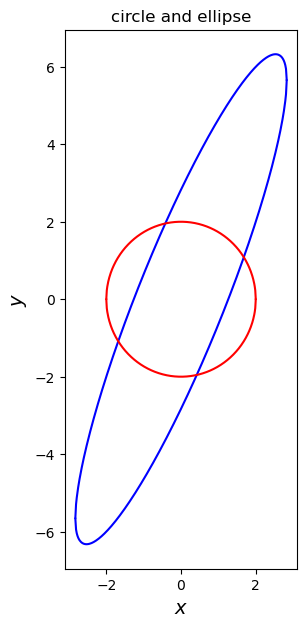

In [113]:
# define x range [a,b]
a1=-np.sqrt(8)+1.e-5
b1=np.sqrt(8)-1.e-5
a2=-2.+1.e-5
b2=2.-1.e-5
# define the number N of points for the plot
N1=300
N2=300
# create the array of N values for x
x1=np.linspace(a1,b1,N1)
x2=np.linspace(a2,b2,N2)
# evaluate the function
y1=g(x1)
z1=h(x1)
y2=f(x2)
z2=-f(x2)
# plot f(x)
plt.figure(figsize=(3,7))
plt.plot(x1,y1,color='blue')
plt.plot(x1,z1,color='blue')
plt.plot(x2,y2,color='red')
plt.plot(x2,z2,color='red')
plt.title('circle and ellipse')
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)

Define $F_0$ and $F_1$:
\begin{equation}
 F_0=x^2+y^2-4
 \end{equation}
and
\begin{equation}
 F_1=5x^2-4xy+y^2-8.
\end{equation}
Thus
\begin{equation}
\frac{\partial F_0}{\partial x}=2x\textrm{; } \,\,  \frac{\partial F_0}{\partial y}=2y 
\end{equation}
and
\begin{equation}
\frac{\partial F_1}{\partial x}=10x-4y\textrm{; } \,\,  \frac{\partial F_1}{\partial y}=2y-4x 
\end{equation} 

In [114]:
def f0(x,y):
    return x**2+y**2-4

def f1(x,y):
    return 5*x**2-4*x*y+y**2-8

def df0x(x):
    return 2*x

def df0y(y):
    return 2*y

def df1x(x,y):
    return 10*x-4*y

def df1y(x,y):
    return 2*y-4*x

In [117]:
N=2
J = np.empty((N,N))
F = np.empty(N)
deltax = np.empty(N)
M=10
x = np.empty(M+1)
y = np.empty(M+1)
x[0]=3.1 #3.1
y[0]=7.5
for step in range(M):
    F[0]=-f0(x[step],y[step])
    F[1]=-f1(x[step],y[step])
    J[0,0]=df0x(x[step])
    J[0,1]=df0y(y[step])
    J[1,0]=df1x(x[step],y[step])
    J[1,1]=df1y(x[step],y[step])

    J_1 = np.linalg.inv(J)
    deltax = np.dot(J_1, F)

    beta=1.
    alpha=1e-4
    x[step+1]=x[step]+deltax[0]
    y[step+1]=y[step]+deltax[1]
##############
# backtracking
##############
    f_old = 0.5*(f0(x[step],y[step])**2+f1(x[step],y[step])**2)
    f_new = 0.5*(f0(x[step+1],y[step+1])**2+f1(x[step+1],y[step+1])**2)
    crit = alpha*beta*(-2)*f_old
    while f_new - f_old > crit:#beta*f_old:
        beta = 0.5*beta
        x[step+1]=x[step]+beta*deltax[0]
        y[step+1]=y[step]+beta*deltax[1]
        f_new = 0.5*(f0(x[step+1],y[step+1])**2+f1(x[step+1],y[step+1])**2)
        crit = alpha*(-2)*f_old*beta#np.dot(gradf,beta*x)
############
print('x=',x[M])
print('y=',y[M])

x= -0.42086143143284677
y= 1.9552175468556676


Text(0, 0.5, '$y$')

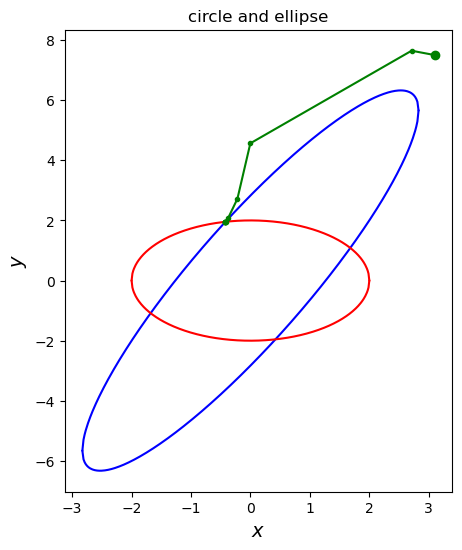

In [118]:
plt.figure(figsize=(5,6))
plt.plot(x1,y1,color='blue')
plt.plot(x1,z1,color='blue')
plt.plot(x2,y2,color='red')
plt.plot(x2,z2,color='red')
plt.plot(x,y,color='green', marker='o',markersize=3)
plt.plot(x[0],y[0],color='green', marker='o')
plt.title('circle and ellipse')
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)